### 1. A nasty integral

Using Monte Carlo integration, check that

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

- Does the result converge with the number of samples? And how does the error go down?
- Do it many times. For a given $N$, how are the result distributed? We'll talk about model fitting at lenght later on, but for now try to fit it by hand with a parametrized model. (If N is large enough you should get something that looks *very* accurate! And if $N$ is small?)
- How does the distribution change if $N$ increases?

(Hint: think about sample mean and sample variance)

In [ ]:
# LECTURE 3
# MONTE CARLO INTEGRATION of f(x) between 0 and +inf -> demonstrate that it is equal to 2*sigma**4
#  write down the integrand as a product of h(x) and p(x), knowing that the integral of p(x) is equal 1

# > OPTIONAL

In [2]:
import numpy as np
import math
from scipy.stats import norm
import pylab as plt
plt.rcParams['figure.figsize'] = [8, 8]

In [3]:
# FUNCTION DEFINITION
# function |f(x)| to integrate 
def f (x, s): 
    H = x**3 * np.exp(-x**2 / 2*s**2)
    return np.abs(H)

# f(x) is an odd function -> |f(x)| is even function -> integral between -inf and +inf devided by 2

# function p(x), whose integral between -inf and +inf is 1 -> GAUSSIAN DISTRIBUTION: mean = 0, standard deviation = s
def gauss (x, s):
    return 1/math.sqrt(2*math.pi*s**2) * math.exp(-x**2/2*s**2) 

# > f(x) = s*math.sqrt(2*math.pi) * h(x) * p(x) -> h(x) = x**3 
def h(x):
    return np.abs(x**3)

In [4]:
# > generation of N random numbers following the gaussian normal distribution between -inf and +inf
N = 100
s = 1
Tr_value = 2*s**4

print("INTEGRAL VALUE EXPECTED = ", Tr_value)

list_n = []
list_int = []

for I in range(20):
    x = np.random.normal(0, s, N)
    integral = s*math.sqrt(2*math.pi) * np.mean(h(x))
    print("MC INTEGRAL = ", integral/2)

    list_n.append(N)
    list_int.append(integral/2)
    N = N * 2

arrN = np.array(list_n)
arrINT = np.array(list_int)

INTEGRAL VALUE EXPECTED =  2
MC INTEGRAL =  2.197661359852057
MC INTEGRAL =  1.8978697962095095
MC INTEGRAL =  1.9283742028750113
MC INTEGRAL =  2.0512124974343235
MC INTEGRAL =  2.15463070556469
MC INTEGRAL =  2.0119237822744767
MC INTEGRAL =  2.056950465772639
MC INTEGRAL =  1.9846623028772934
MC INTEGRAL =  1.997125798465672
MC INTEGRAL =  2.038254720997913
MC INTEGRAL =  2.0039167822943753
MC INTEGRAL =  2.0141945809487227
MC INTEGRAL =  2.005625572492781
MC INTEGRAL =  1.9920973023869324
MC INTEGRAL =  1.9999256569240307
MC INTEGRAL =  1.9999726690390665
MC INTEGRAL =  2.002653866761297
MC INTEGRAL =  2.0014154368091384
MC INTEGRAL =  1.999313045144919
MC INTEGRAL =  2.000225161545724


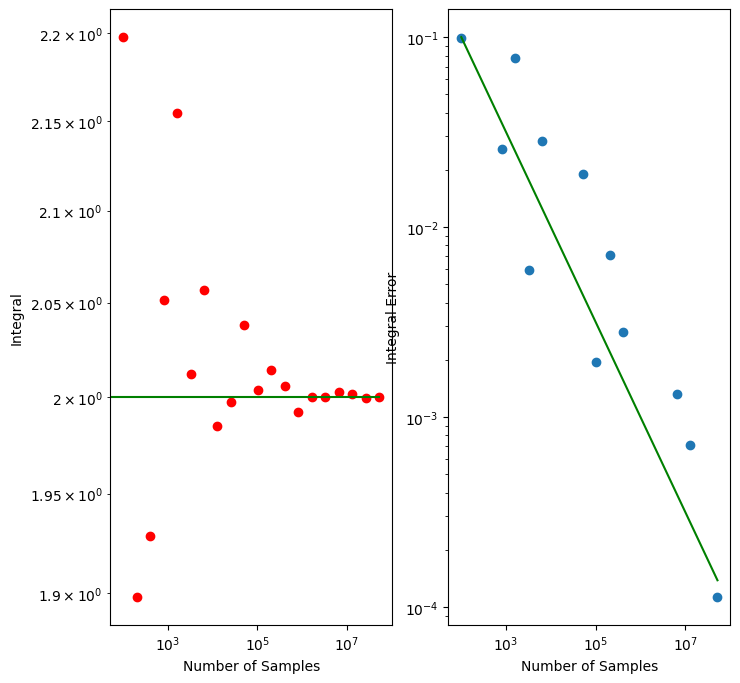

In [5]:
# > Does the result converge with the number of samples? And how does the error go down?
plt.figure(1) # Figure with 1 row and 2 columns

# INTEGRAL CONVERGENCE 
plt.subplot(1, 2, 1)  

Nlast = arrN[-1]
plt.plot([0, Nlast], [2 * s**4, 2 * s**4], color='green') 
plt.scatter(arrN, arrINT, color='red')
plt.xlabel('Number of Samples')
plt.ylabel('Integral')
plt.loglog()

# ERROR DECREASE
plt.subplot(1, 2, 2) 

arrERR = 1 / np.sqrt(arrN) # a decrease proportional to 1/sqrt(N)
plt.plot(arrN, arrERR, color='green')
plt.scatter(arrN, (arrINT-Tr_value)/Tr_value) # error

plt.loglog()
plt.xlabel('Number of Samples')
plt.ylabel('Integral Error')
plt.show()

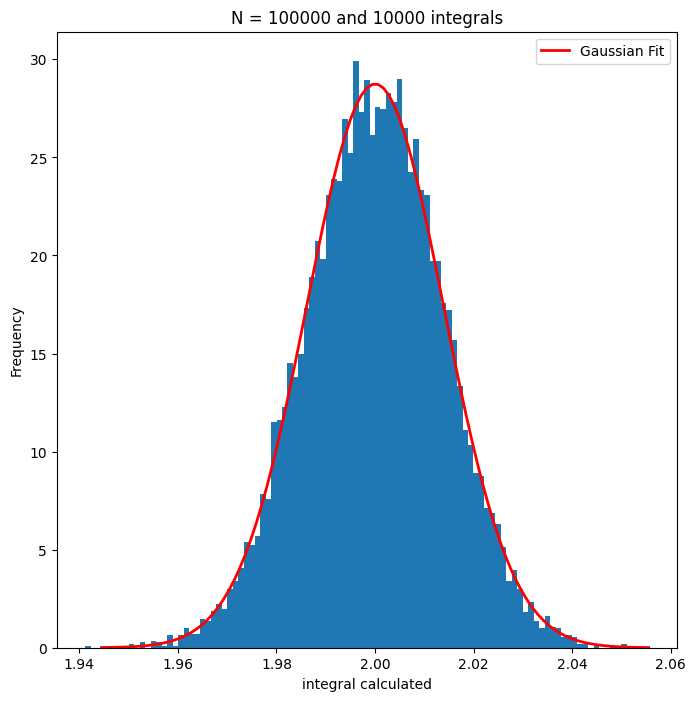

In [6]:
# > Repeat the calculus multiple times with the same N
num = 10000
list_N = []
list_INT = []
N = 100000

for I in range(num):
    x = np.random.normal(0, s, N)
    integral = s*math.sqrt(2*math.pi) * np.mean(h(x))
    list_INT.append(integral/2)

ARR_INT = np.array(list_INT)

plt.figure(2)

plt.hist(ARR_INT, bins=100, density=True)
plt.title(f'N = {N} and {num} integrals')
plt.xlabel('integral calculated')
plt.ylabel('Frequency')

mu, sigma_mc = np.mean(ARR_INT), np.std(ARR_INT)
x = np.linspace(mu - 4*sigma_mc, mu + 4*sigma_mc, 100)
gaussian_fit = norm.pdf(x, mu, sigma_mc)
plt.plot(x, gaussian_fit, 'r-', lw=2, label="Gaussian Fit")
plt.legend()

plt.show()